## Fake News Classifier

Fake news is misinformation or manipulated news that is spread across the social media with an intention to damage a person, agency and organization. It is very easy for someone to write fake news on the web that would grab the people's attention. Because of the increasing spread of such unverified click-bait articles on every platform, detecting fake news is believed to be a complex yet important task in the recent years.

This project aims to classify fake news from a dataset of labelled news articles using the Natural Language Processing, Machine Learning algorithms and Deep Learning techniques.

**Setup**

In [ ]:
## uploading csv files on drive (to avoid uploading on colab in every session)

from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
## import the basic libraries

import numpy as np
import pandas as pd

In [ ]:
## import NLP libraries

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
## import data visualization libraries

import plotly.graph_objects as go

**Dataset** 

In this project, Fake and Real News dataset from Kaggle is used for this Fake News Classification task. The link to the dataset is given below:

 https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

In [ ]:
## drive path

fake_path = "/content/drive/MyDrive/FakeNews/Fake.csv"
true_path = "/content/drive/MyDrive/FakeNews/True.csv"

In [ ]:
## load the dataset .csv files from the drive path

fake_df = pd.read_csv(fake_path)
true_df = pd.read_csv(true_path)

In [ ]:
## number of records and columns in fake.csv

fake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [ ]:
## number of records and columns in true.csv

true_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


**Data Exploration**

The fake.csv file contains 23481 fake news articles and the true.csv file contains 21417 true news articles.

In [ ]:
## sample - fake article

fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
fake_df.shape

(23481, 4)

In [ ]:
## sample - true article

true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
true_df.shape

(21417, 4)

**Data Preprocessing**

A new column ‘label’ is created in both the true dataset: true_df ;  and fake dataset: fake_df which denotes the class of the news - whether the article is fake or true. The ‘label’ column is assigned – ‘1’ for true news article, ‘0’ for fake news article.


In [ ]:
## new column label; assign label - 1 for true, 0 for fake

true_df['label'] = 1
fake_df['label'] = 0

For the purpose of classification task, both the fake and true datasets are combined and shuffled to create the main dataset that would be used for training the model.

In [ ]:
## combining both true and fake datasets

data = true_df.append(fake_df,ignore_index=True) # ignore_index true to avoid copying index
data.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
## data needs to be shuffled to mix true and fake entries
## frac=1 will return all rows in random order. shuffles dataframe in-place and reset the index

data = data.sample(frac=1).reset_index(drop=True)
data.head()

,title,text,subject,date,label
0,LORETTA LYNCH Makes Disturbing VIDEO Encouragi...,Obama s former AG Loretta Lynch released a vid...,left-news,"Mar 4, 2017",0
1,"Ex-Nusra vows to fight on in Syria, denounces ...",BEIRUT (Reuters) - The former al Qaeda branch ...,worldnews,"September 16, 2017",1
2,Saudi police release teenager detained for dan...,DUBAI (Reuters) - A 14-year-old boy who was de...,worldnews,"August 22, 2017",1
3,U.S. military says no civilians killed in Augu...,NAIROBI (Reuters) - The U.S. military did not ...,worldnews,"November 30, 2017",1
4,White House's Cohn: 'All on board' to do tax r...,WASHINGTON (Reuters) - White House economic ad...,politicsNews,"June 7, 2017",1


In [ ]:
data['title'][20]

'Trump EPA pick says backs biofuels program, but open to tweaks'

In [ ]:
data['text'][20]

'WASHINGTON (Reuters) - Oklahoma Attorney General Scott Pruitt, President-elect Donald Trump’s choice to lead the Environmental Protection Agency, said on Wednesday he would honor the intent of the U.S. biofuels program, but remained open to tweaking it. The Renewable Fuel Standard requires the EPA set annual quotas for the use of ethanol and biodiesel in transportation fuels. More than a decade old, the standard is fiercely defended by the U.S. corn industry that provides most of the ethanol, but it has been a source of frustration for oil refiners. They say the goals are unrealistic without an overhaul in automobiles and infrastructure, and are calling for changes.  Pruitt said during his confirmation hearing on Wednesday that he was committed to Congress’ plan, laid out in 2007, to annually increase the amount of ethanol and other renewables blended with petroleum fuels. He said the waivers that EPA has already used to set requirements below those targets to accommodate market condi

Check for any missing values

In [ ]:
## Check for any missing values

data.isnull().value_counts() # all false means that no missing values

title  text   subject  date   label
False  False  False    False  False    44898
dtype: int64

**Data Visualization**

The distribution of True and Fake news articles is depicted using Pie charts

In [ ]:
## True and Fake news Distribution

fig = go.Figure(
    data=[
        go.Pie(
            labels=['Fake', 'True'], 
            values=list(data['label'].value_counts()), 
            hole=.3
        )
    ]
)

fig.update_layout(title="True and Fake News Distribution")
fig.show()

The news articles in the dataset belong to different subject categories. A bar-chart can be generated to view the number of articles belonging to each category

In [ ]:
## Find the unique values in 'subject' column

data['subject'].unique()

array(['left-news', 'worldnews', 'politicsNews', 'Government News',
       'News', 'politics', 'Middle-east', 'US_News'], dtype=object)

In [ ]:
## Subject wise news Distribution - (Barchart)

import plotly.graph_objects as go

arr = data['subject'].value_counts()    # data.groupby('subject').count()
fig = go.Figure([go.Bar(x=arr.index, y=arr)])

fig.update_layout(title="Subject wise News Distribution")
fig.update_xaxes(title_text="Subject")
fig.update_yaxes(title_text="Number of Articles")
fig.show()

**Feature Engineering**

For the fake news classification task, the ‘text’ column will be used to train the model and predict the ‘label’ to which it belongs. Therefore, the ‘text’ column values will be used to extract independent features and the ‘label’ column becomes the dependent feature.

In [ ]:
# independent and dependent features

text = data['text']
y = data['label']

NLTK library from python is very powerful and useful for any Natural Language Processing Task. With the help of NLTK stopwords and PorterStemmer, the news article text data can be cleaned in order to reduce the text length and get more meaningful words. Both these techniques are applied on the ‘text’ column.

In [ ]:
## Remove all stopwords
## Convert words to their root form (PorterStemmer)

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

ps = PorterStemmer()
corpus = []
for i in range(0, len(data)):
    review = re.sub('[^a-zA-Z]', ' ', text[i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

TF-IDF which measures how important a particular word is with respect to a document and the entire corpus. Words which are rare in a document will have a high score in the TF-IDF vector. 

In [ ]:
## TFidf Vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [ ]:
X.shape

(44898, 5000)

In [ ]:
## view the first 10 features

tfidf_v.get_feature_names()[:10]

['abadi',
 'abandon',
 'abba',
 'abc',
 'abc news',
 'abdullah',
 'abe',
 'abedin',
 'abid',
 'abil']

In [ ]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

The dataset is divided into Train and Test data. 70% of the data will be used to train the model and 30% of the data will be used to predict the output and test the model for accuracy. 

In [ ]:
## Divide the dataset into Train and Test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

All the news articles in the dataset will be now represented by these 5000 features and each feature will have a value depending upon its occurrence in the article.

In [ ]:
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names())
count_df.head()

,abadi,abandon,abba,abc,abc news,abdullah,abe,abedin,abid,abil,abl,abort,abroad,absenc,absolut,absurd,abu,abus,academ,academi,accept,access,accid,accommod,accompani,accomplish,accord,accord new,accord report,accord reuter,account,accur,accus,achiev,acknowledg,aclu,acquir,acr,across,across countri,...,www,www youtub,www youtub com,xi,xi jinp,yate,ye,yeah,year,year ago,year later,year old,year prison,year said,yell,yemen,yesterday,yet,yet anoth,yield,york,york citi,york reuter,york time,york time report,young,young peopl,younger,youth,youtu,youtub,youtub com,youtub com watch,zealand,zero,zika,zimbabw,zone,zor,zuma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.027489,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022711,0.0,0.0,0.021303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028979,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.037854,0.0,0.0,0.0,0.026478,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


Code for confusion matrix

In [ ]:
## Code for confusion matrix

import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

**Train Model - to predict the label of the news**

MultinomialNB Algorithm

In [ ]:
## MultinomialNB Algorithm

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, log_loss
from sklearn.metrics import classification_report

import numpy as np
import itertools
from sklearn.naive_bayes import MultinomialNB

In [ ]:
## train the model

classifier=MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
## predict the model accuracy for test data

y_pred = classifier.predict(X_test)
score = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
ll = log_loss(y_test, y_pred)

print("Multinomial Naive Bayes classifier")
print(f"accuracy_score: {score}")
print(f"f1_score: {f1}")
print(f"log_loss: {ll}")

Multinomial Naive Bayes classifier
accuracy_score: 0.9466963622865627
f1_score: 0.944263313150132
log_loss: 1.8410640315523736


Confusion matrix, without normalization


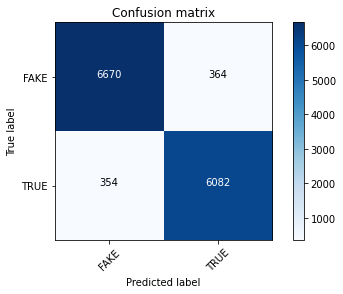

In [ ]:
## generate the confusion matrix

cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['FAKE', 'TRUE'])

In [ ]:
## generate classification report

print(classification_report(y_test, y_pred, target_names=['Fake', 'True'], zero_division=0))

              precision    recall  f1-score   support

        Fake       0.95      0.95      0.95      7034
        True       0.94      0.94      0.94      6436

    accuracy                           0.95     13470
   macro avg       0.95      0.95      0.95     13470
weighted avg       0.95      0.95      0.95     13470



LogisticRegression Algorithm

In [ ]:
## LogisticRegression Algorithm

In [ ]:
## train the model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced', penalty='l2', solver='liblinear', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
## predict the model accuracy for test data

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
ll = log_loss(y_test, y_pred)

print("LogisticRegression Classifier")
print(f"accuracy_score: {acc}")
print(f"f1_score: {f1}")
print(f"log_loss: {ll}")

LogisticRegression Classifier
accuracy_score: 0.9872308834446919
f1_score: 0.9867058277940948
log_loss: 0.44103672546539296


Confusion matrix, without normalization


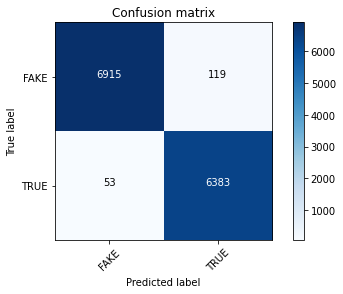

In [ ]:
## generate the confusion matrix

cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['FAKE', 'TRUE'])

In [ ]:
## generate the classification report

print(classification_report(y_test, y_pred, target_names=['Fake', 'True'], zero_division=0))

              precision    recall  f1-score   support

        Fake       0.99      0.98      0.99      7034
        True       0.98      0.99      0.99      6436

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



Passive Aggressive Classifier Algorithm

In [ ]:
## Passive Aggressive Classifier Algorithm

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier()

In [ ]:
## train the model
linear_clf.fit(X_train, y_train)

## predict the model accuracy for test data

y_pred = linear_clf.predict(X_test)

score = metrics.accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
ll = log_loss(y_test, y_pred)

print("Passive Aggressive Classifier")
print(f"accuracy_score: {score}")
print(f"f1_score: {f1}")
print(f"log_loss: {ll}")

Passive Aggressive Classifier
accuracy_score: 0.9944320712694877
f1_score: 0.9941828899402776
log_loss: 0.1923122947509253


Confusion matrix, without normalization


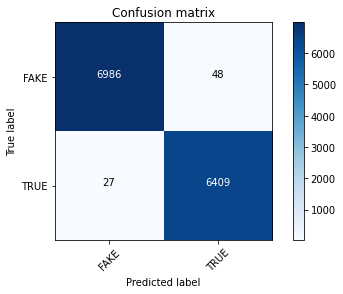

In [ ]:
## generate the confusion matrix

cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['FAKE', 'TRUE'])

In [ ]:
## generate the classification matrix

print(classification_report(y_test, y_pred, target_names=['Fake', 'True'], zero_division=0))

              precision    recall  f1-score   support

        Fake       1.00      0.99      0.99      7034
        True       0.99      1.00      0.99      6436

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



In [ ]:
## Get Features names

feature_names = tfidf_v.get_feature_names()
classifier.coef_[0]

array([-8.83076922, -8.92041495, -8.92813273, ..., -8.28180888,
       -8.93633107, -8.23299428])

In [ ]:
### Top 25 Most TRUE words/phrases

sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:25]

[(-4.920317083424649, 'said'),
 (-5.353089022919008, 'trump'),
 (-5.639078349225046, 'reuter'),
 (-5.669313687079515, 'state'),
 (-5.837831868575991, 'presid'),
 (-5.896498748863681, 'would'),
 (-5.965350068753054, 'republican'),
 (-6.000742587907267, 'govern'),
 (-6.067118740899649, 'senat'),
 (-6.1037202764963245, 'hous'),
 (-6.134249489391789, 'elect'),
 (-6.146179783571669, 'year'),
 (-6.187592175351822, 'parti'),
 (-6.200950034660775, 'unit'),
 (-6.21664812380391, 'washington'),
 (-6.239172365572799, 'democrat'),
 (-6.271139157010484, 'minist'),
 (-6.284050588250048, 'offici'),
 (-6.316430374436662, 'new'),
 (-6.343396518468242, 'vote'),
 (-6.347380510494509, 'report'),
 (-6.3479930343757704, 'told'),
 (-6.376958491388795, 'court'),
 (-6.382261892631403, 'north'),
 (-6.390855145409359, 'tax')]

In [ ]:
## Top 25 Most FAKE words/phrases

sorted(zip(classifier.coef_[0], feature_names))[:25]

[(-11.863965789307818, 'alex wong'),
 (-11.863965789307818, 'antifa'),
 (-11.863965789307818, 'becom member wire'),
 (-11.863965789307818, 'boiler room'),
 (-11.863965789307818, 'cdata'),
 (-11.863965789307818, 'centuri wire'),
 (-11.863965789307818, 'centuri wire say'),
 (-11.863965789307818, 'chip somodevilla'),
 (-11.863965789307818, 'chip somodevilla getti'),
 (-11.863965789307818, 'com watch'),
 (-11.863965789307818, 'entir stori'),
 (-11.863965789307818, 'featur imag screenshot'),
 (-11.863965789307818, 'featur imag via'),
 (-11.863965789307818, 'filessupport'),
 (-11.863965789307818, 'filessupport wire'),
 (-11.863965789307818, 'filessupport wire subscrib'),
 (-11.863965789307818, 'finicum'),
 (-11.863965789307818, 'flickr'),
 (-11.863965789307818, 'gateway pundit'),
 (-11.863965789307818, 'getti'),
 (-11.863965789307818, 'getti imag'),
 (-11.863965789307818, 'henningsen'),
 (-11.863965789307818, 'http'),
 (-11.863965789307818, 'http co'),
 (-11.863965789307818, 'http twitter')]

LSTM model

In [ ]:
# Deep Learning - Using LSTM model

import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [ ]:
tf.__version__

'2.6.0'

In [ ]:
### Vocabulary size
voc_size=5000

In [ ]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 

In [ ]:
## embedding representation

sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[ 609 2622 3780 ...  851 1673 3513]
 [4183  649  609 ... 2078 2471 4981]
 [2896  288  225 ... 2372 1454 1239]
 ...
 [2206 3383 3520 ... 4471  590 4648]
 [4983 4156  448 ... 3890 1156 4792]
 [3317 3733  305 ... 2059 1513 3391]]


In [ ]:
embedded_docs[0]

array([ 609, 2622, 3780, 2050, 3383, 4506, 2672, 3250,  573,  649, 1673,
        517,   58, 3798, 4193, 3176, 3780,  851, 1673, 3513], dtype=int32)

In [ ]:
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            200000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
len(embedded_docs),y.shape

(44898, (44898,))

In [ ]:
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [ ]:
X_final.shape,y_final.shape

((44898, 20), (44898,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.3, random_state=42)

In [ ]:
## Training the model
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
492/492 [==============================] - 20s 36ms/step - loss: 0.2068 - accuracy: 0.9115 - val_loss: 0.1584 - val_accuracy: 0.9416
Epoch 2/10
492/492 [==============================] - 17s 34ms/step - loss: 0.1033 - accuracy: 0.9626 - val_loss: 0.1364 - val_accuracy: 0.9492
Epoch 3/10
492/492 [==============================] - 17s 34ms/step - loss: 0.0716 - accuracy: 0.9753 - val_loss: 0.1408 - val_accuracy: 0.9528
Epoch 4/10
492/492 [==============================] - 17s 34ms/step - loss: 0.0494 - accuracy: 0.9838 - val_loss: 0.1599 - val_accuracy: 0.9528
Epoch 5/10
492/492 [==============================] - 17s 34ms/step - loss: 0.0342 - accuracy: 0.9891 - val_loss: 0.1811 - val_accuracy: 0.9511
Epoch 6/10
492/492 [==============================] - 17s 34ms/step - loss: 0.0270 - accuracy: 0.9908 - val_loss: 0.1941 - val_accuracy: 0.9540
Epoch 7/10
492/492 [==============================] - 17s 34ms/step - loss: 0.0204 - accuracy: 0.9931 - val_loss: 0.2089 - val_accuracy:

In [ ]:
## predict_class
y_pred = model.predict(X_test)

In [ ]:
print(y_pred)

[[1.0424401e-09]
 [1.5207295e-10]
 [3.7447942e-06]
 ...
 [9.9973172e-01]
 [9.9994576e-01]
 [2.5501354e-10]]


In [ ]:
## generate model accuracy

score = metrics.accuracy_score(y_test, np.round(abs(y_pred)))

f1 = f1_score(y_test, np.round(abs(y_pred)))

print("LSTM")
print(f"accuracy_score: {score}")
print(f"f1_score: {f1}")

LSTM
accuracy_score: 0.9528582034149963
f1_score: 0.9498142732948708


In [ ]:
## performance metrics
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,np.round(abs(y_pred)))

array([[6826,  281],
       [ 354, 6009]])

In [ ]:
## model accuracy

from sklearn.metrics import accuracy_score
accuracy_score(y_test,np.round(abs(y_pred)))

0.9528582034149963